## Name: Gautam Chutani
### GRIP - The Sparks Foundation
## Task-1 : Prediction using Supervised ML
### Aim: Predict the percentage of student based on no. of study hours using Linear Regression

In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading and Exploring the Dataset

In [2]:
# Loading the dataset

url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('Dataset imported successfully!!')

Dataset imported successfully!!


In [3]:
# Getting the first five values from dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Dimensionality of the dataset i.e number of rows and columns
df.shape

(25, 2)

In [6]:
# Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# Statistical information of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Finding pairwise correlation of all columns
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Visualising the Dataset

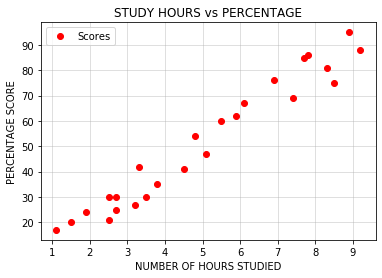

In [9]:
# Visualising the dataset by plotting the data on a 2-D graph

df.plot(x='Hours', y='Scores' , style = 'ro' , legend = True)
plt.xlabel('NUMBER OF HOURS STUDIED')
plt.ylabel('PERCENTAGE SCORE')
plt.title('STUDY HOURS vs PERCENTAGE')
plt.grid(alpha=0.5)
plt.show()

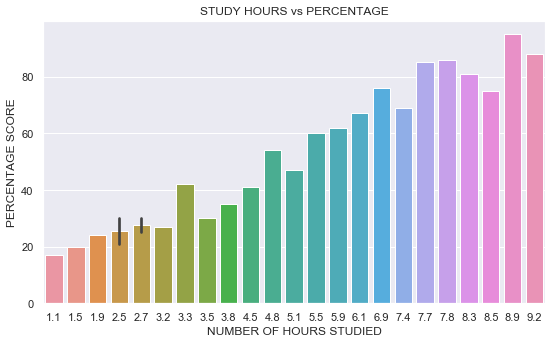

In [10]:
# Visualising the dataset through Bar plot

sns.set(rc={'figure.figsize':(9,5.2)})
sns.barplot(x=df.Hours, y=df.Scores)
plt.xlabel('NUMBER OF HOURS STUDIED')
plt.ylabel('PERCENTAGE SCORE')
plt.title('STUDY HOURS vs PERCENTAGE')
plt.show()

From the above plots, it can be clearly seen that there is a positive linear relationship between number of hours studied and percentage score obtained by the student.


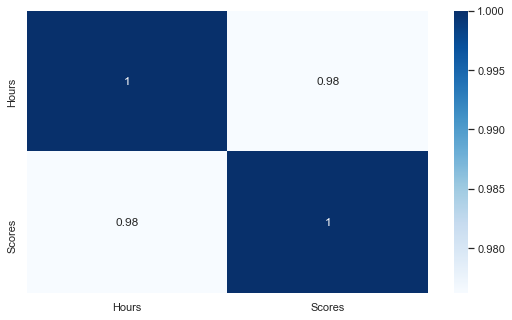

In [11]:
sns.heatmap(df[['Hours', 'Scores']].corr() ,annot=True, cmap = plt.cm.Blues);

#### Data Preprocessing

In [12]:
# Fitting the dataset
x = df[['Hours']].values
y = df[['Scores']].values

#### Here x is independent variable(input/attribute) and y is dependent variable(output/label).

In [13]:
# Splitting the data into training and test sets using Scikit Learn library

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
#Shape of training and test data:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20, 1) (5, 1)


#### Model Training

In [15]:
# Training the model with linear regression algorithm

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Successfully completed Model Training.')

Successfully completed Model Training.


#### Model Parameters

In [16]:
# Getting the regressor coefficient(slope) and constant(intercept) term

print("Intercept:", regressor.intercept_)
print("Regression coefficient:", regressor.coef_)

Intercept: [2.01816004]
Regression coefficient: [[9.91065648]]


In [17]:
# Estimating training and test scores

print(regressor.score(x_train,y_train))
print(regressor.score(x_test,y_test))

0.9515510725211552
0.9454906892105356


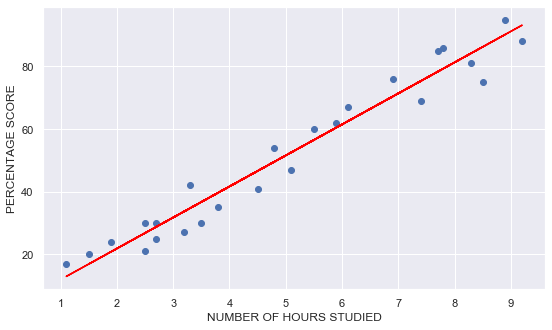

In [18]:
# Plotting the regression line

line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line, color = 'red');
plt.xlabel("NUMBER OF HOURS STUDIED")
plt.ylabel("PERCENTAGE SCORE")
plt.show()

In [19]:
# Making prediction for training and test dataset

y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

#### Comparing actual data with predicted model results

In [20]:
#Comparing Original values with the Predicted data

df_compare = pd.DataFrame({'Original': y_test.flatten(), 'Predicted': y_pred_test.flatten()})
df_compare

,Original,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


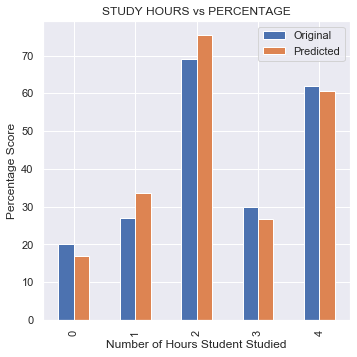

In [21]:
df_compare.plot(kind='bar', figsize=(5.5,5.5))
plt.xlabel('Number of Hours Student Studied')
plt.ylabel('Percentage Score')
plt.title('STUDY HOURS vs PERCENTAGE')
plt.show()

#### Question: What will be the predicted score if a student studies for 9.25 hours/day?

In [22]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("If a student studies for {}".format(hours),"hours a day, then the expected score is {}%".format(prediction[0]))

If a student studies for 9.25 hours a day, then the expected score is [93.69173249]%


#### Evaluating the Model

In [23]:
# Checking the Accuracy of Regression Model

Accuracy = regressor.score(x_test,y_test)
print("The model works with a Accuracy of", Accuracy*100, "%")

The model works with a Accuracy of 94.54906892105356 %


In [24]:
# Measuring the regression performance

from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test, y_pred_test.flatten()))
print("Mean Squared Error :",metrics.mean_squared_error(y_test, y_pred_test))
print("Root Mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test.flatten())))

Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.5987693072174
Root Mean Square Error : 4.6474476121003665


The r2_score represents the proportion of variance (of y) that has been explained by the independent variable in the model.
It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted 
by the model, through the proportion of explained variance.

In [25]:
# Checking R-squared score of the model

from sklearn.metrics import r2_score
print("#### stats on training dataset ####")
print("R-squared score:", r2_score(y_train, y_pred_train))
print("#### stats on test dataset ####")
print("R-squared score:", r2_score(y_test, y_pred_test))

#### stats on training dataset ####
R-squared score: 0.9515510725211552
#### stats on test dataset ####
R-squared score: 0.9454906892105356


                                    TASK-1 Completed Successfully